## Titanic - Machine Learning from Disaster

**Cel:** Wykorzystanie uczenia maszynowego do stworzenia modelu, który przewiduje, którzy pasażerowie przeżyli katastrofę Titanica.

In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## **Opis danych**

**Data Dictionary**

| Variable  | Definition                             | Key                                  |
| --------- |:--------------------------------------:|:------------------------------------:|
|survival   |Survival                                |0 = No, 1 = Yes                       |
|pclass     |Ticket class                            |1 = 1st, 2 = 2nd, 3 = 3rd             |
|sex        |Sex                                     |male/female	                        |
|Age        |Age in years                            |	                                    |
|sibsp      |# of siblings/spouses aboard the Titanic|                                      |	
|parch      |# of parents/children aboard the Titanic|                                      |	
|ticket     |Ticket number                           |                                      |
|fare       |Passenger fare                          |                     	                |
|cabin      |Cabin number                            |	                                    |
|embarked   |Port of Embarkation                     |C=Cherbourg,Q=Queenstown,S=Southampton|

## **Dane do uczenia**

In [156]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Podstawowe info na temat danych treningowych.**

In [157]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Dane testowe**

In [158]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Podstawowe info na temat danych testowych.**

In [159]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Sprawdzenie występowania pustych wartości

In [160]:
print(train_data.isnull().sum(), '\n')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Uzupełnienie pustych wartości za pomocą SimpleImputor

In [161]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
#uzupelnienie pustych wartości Age
train_data["Age"] = my_imputer.fit_transform(train_data[["Age"]])
test_data["Age"] = my_imputer.fit_transform(test_data[["Age"]])

#sprawdzenie
print(train_data.isnull().sum(),'\n')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Machine Learning

In [162]:
#import potrzebnych bibliotek
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [163]:

#Cel
y = train_data["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#wybór modelu
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model = DecisionTreeClassifier(random_state=1)

#podzielenie danych
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1,train_size=0.7,test_size=0.3)

#dopasowanie
model.fit(X_train, y_train)

#Obliczenie wartości MEA
print("MEA: ", mean_absolute_error(y_val, model.predict(X_val)))
print("Dokładność: ", model.score(X_train, y_train))

#obliczenie dla danych testowych
predictions = model.predict(X_test)

MEA:  0.2126865671641791
Dokładność:  0.85553772070626


**Output**

In [164]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


## Wynik uzyskany w kaggle

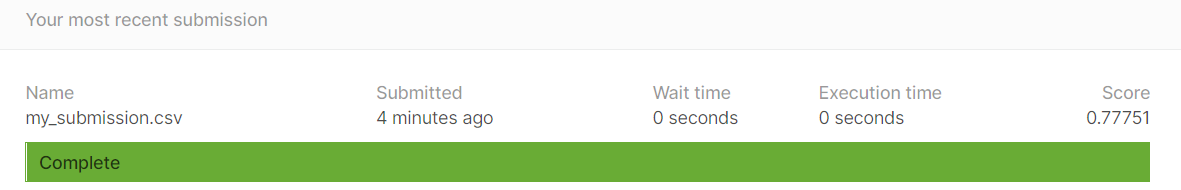